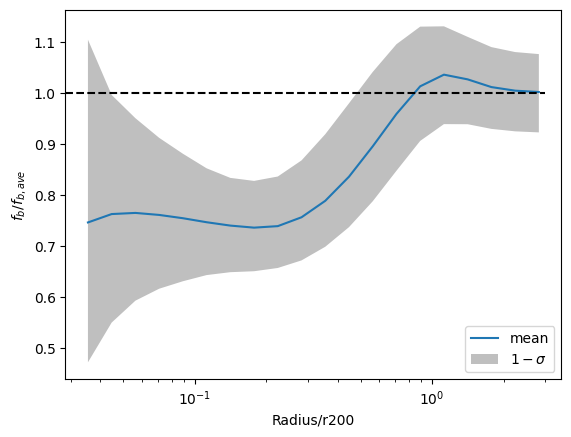

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])
r100=np.array(f['r100'])
r50=np.array(f['r50'])
id=np.array(f['id'])
mass=np.array(f['mass'])[id<=0]
f.close()

r200=r200[id<=0]
r100=r100[id<=0]
r50=r50[id<=0]
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/profile.hdf5", 'r')
dm=np.array(f['dm'])
g=np.array(f['g'])
s=np.array(f['s'])
bins=np.array(f['bins'])
f.close()


ratio=(g*8.56+s*6.174)/dm/45.2/(0.02222/0.7**2/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
#$ax.set_yscale('log')
#for i in tqdm(range(len(dm))):
#    ax.plot(bins, g[i]/dm[i])
average_ratio=np.mean(ratio, axis=0)

per=np.percentile(ratio, [16, 50, 84], axis=0)


    
ax.plot(bins, per[1], label='mean')

ax.fill_between(bins, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.legend()
ax.hlines(1,0,3,linestyles="dashed",colors='k')

ax.set_xlabel('Radius/r200')
ax.set_ylabel(r'$f_{b}$/$f_{b,ave}$')
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")

In [25]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["S_central"])
S_m=np.array(f["S_central_sat"])
S_100=np.array(f["S_r100"])
S_200=np.array(f["S_r200"])
S_rm50=np.array(f["S_r50_m"])
S_rm=np.array(f["S_mem_r100"])
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.set_xscale('log')

S=S_100-S_200
    
p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
b=plt.colorbar(p)
b.set_label("S_cen_sat")
ax.legend()


ax.set_xlabel('r100/r200')
ax.set_ylabel('S100-S200')
#plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")


KeyError: "Unable to synchronously open object (object 'S_r50_m' doesn't exist)"

7793


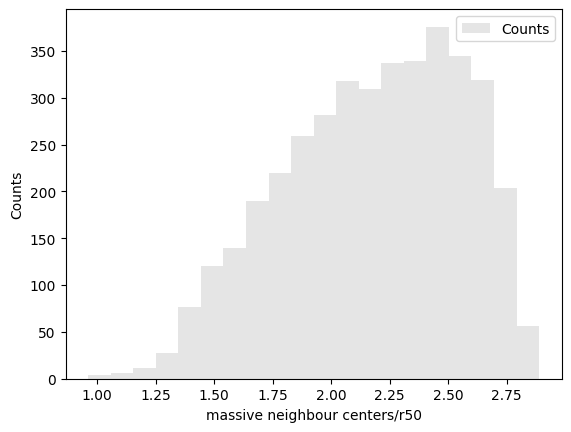

In [2]:
import numpy as np
import h5py
path="/Users/24756376/data/Flamingo/L1000N0900/"
import matplotlib.pyplot as plt
f=h5py.File(path+'S_dist.hdf5','r')
peak=np.array(f["bar_peak"])
f_bar=np.array(f["f_bar"])
f_hot=np.array(f["f_hot"])
f_bar_cu=np.array(f["f_bar_cu"])
f_hot_cu=np.array(f["f_hot_cu"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/neighbour.hdf5", 'r')
i=np.array(f["index"])
d=np.array(f["distance"])
f.close()
f=h5py.File(path+'S_compare.hdf5','r')

S=np.array(f["S_distance"])
f.close()
f=h5py.File(path+'halos_ranked.hdf5','r')
mass=np.array(f["mass"])
ids=np.array(f["id"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])

r50=np.array(f['r50'])
id=np.array(f['id'])
f.close()
r200=r200[r200!=0]
r50=r50[r50!=0]
d=d/r50*r200
mass=mass[ids<=0]
print(len(peak[peak>0]))
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.scatter(peak[peak>0],mass[peak>0]/10**4,s=0.3,alpha=0.3,label='Central Halo Mass')
#ax.set_yscale("log")
ax.hist(d[d!=0],bins=20,alpha=0.2,color='gray',label="Counts")
ax.set_xlabel('massive neighbour centers/r50')
ax.set_ylabel('Counts')
ax.legend()
#print(np.argwhere((peak>0.5)*(peak<1)))



11965
[0.2575 0.3725 0.4875 0.6025 0.7175 0.8325 0.9475 1.0625 1.1775 1.2925
 1.4075 1.5225 1.6375 1.7525 1.8675 1.9825 2.0975 2.2125 2.3275 2.4425]


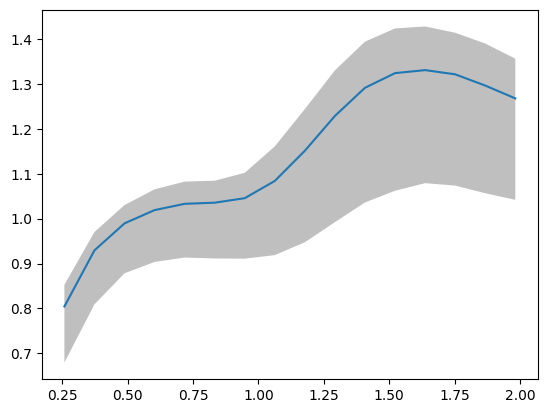

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
print(len(f_bar))
bins=np.linspace(0.2,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(bin)
per=np.percentile(f_bar[d==0], [16, 50, 64], axis=0)

ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")

11965
[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375 1.0625 1.1875
 1.3125 1.4375 1.5625 1.6875 1.8125 1.9375 2.0625 2.1875 2.3125 2.4375]


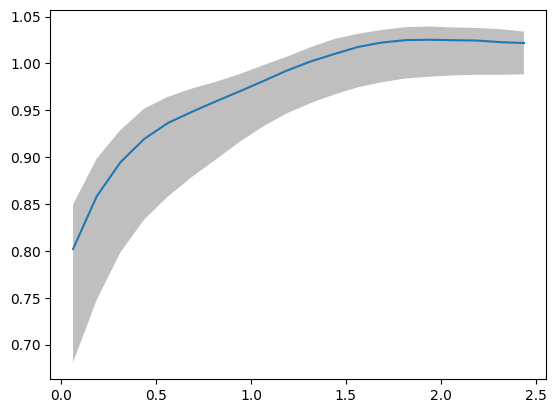

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
print(len(f_bar))
bins=np.linspace(0,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(bin)
per=np.percentile(f_bar_cu[peak==0], [16, 50, 64], axis=0)

ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")

[[2754 8222 8969 7844 7002 5536 4754 3991 3437 3131 3137 2961 3053 2916
  2643 2414 2260 2128 2097 2243 2209 2044 1983 2232 2281]
 [2140 7179 8725 7286 6206 5588 5511 5824 6760 5847 4230 3351 2709 2282
  2063 1963 1860 1808 1687 1743 1802 1968 2032 2085 2166]
 [3058 6186 7575 7887 6566 5256 4196 3442 2947 2689 2611 2568 2750 2660
  2464 2341 2384 2192 1876 1684 1655 1734 1694 1773 1768]
 [2837 7043 6611 5673 5329 4898 4188 3684 3267 2773 2176 1690 1608 1613
  1843 2399 2232 1622 1417 1242 1105 1054 1092 1095 1064]
 [3583 7324 6566 5680 4800 3952 3528 3248 2695 2397 2166 2138 2103 2403
  2797 2689 2119 1805 1673 1575 1509 1510 1599 1492 1496]]
11965


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/2373023792.py:10: RuntimeWarning: invalid value encountered in divide
  fbar=hgas_neigh/(hdm_neigh+hgas_neigh)


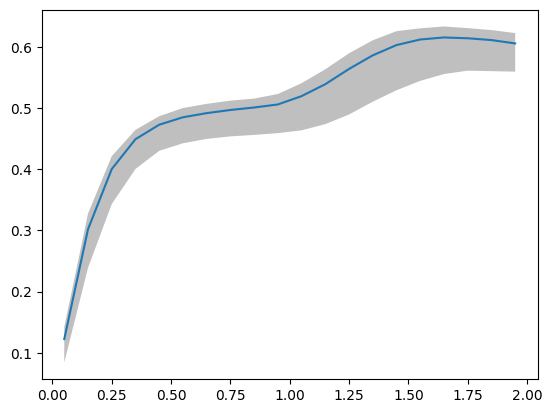

In [8]:
f=h5py.File(path+"particle_counts.hdf5","r")
hdm_neigh=np.array(f["hdm_neigh"])
hgas_neigh=np.array(f["hgas_neigh"])
hdm_sat=np.array(f["hdm_sat"])
hgas_sat=np.array(f["hgas_sat"])
hgas=np.array(f["hgas"])
hdm=np.array(f["hdm"])
bin=np.array(f["bin"])
g_min=np.min(hdm_neigh, axis=1)
fbar=hgas_neigh/(hdm_neigh+hgas_neigh)
f.close()
print(hgas_neigh[0:5])
fig=plt.figure()
ax=fig.add_subplot(111)
print(len(fbar))
per=np.percentile(fbar[d==0], [16, 50, 64], axis=0)
ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")

(array([3251., 3565., 2141., 1204.,  758.,  473.,  331.,  167.,   54.,
          21.]),
 array([0.        , 0.0493385 , 0.098677  , 0.1480155 , 0.197354  ,
        0.2466925 , 0.296031  , 0.3453695 , 0.39470799, 0.44404649,
        0.49338499]),
 <BarContainer object of 10 artists>)

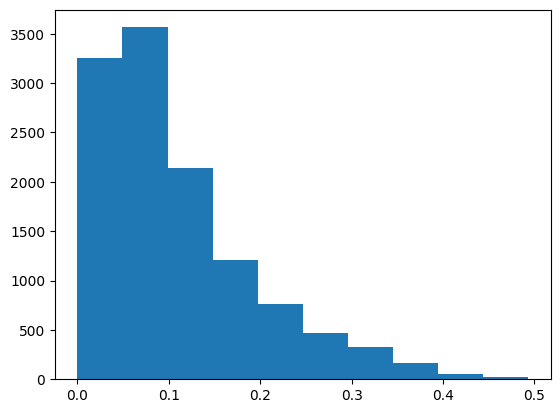

In [58]:
Nsat=(hdm_neigh-hdm_sat)
fig=plt.figure()
ax=fig.add_subplot(111)
rsat=np.sum(Nsat, axis=1)/np.sum(hdm_neigh, axis=1)
ax.hist(rsat)

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:3: RuntimeWarning: divide by zero encountered in divide
  per=np.percentile(hgas/hdm, 50, axis=0)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:3: RuntimeWarning: invalid value encountered in divide
  per=np.percentile(hgas/hdm, 50, axis=0)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:6: RuntimeWarning: divide by zero encountered in divide
  per=np.percentile(hgas_neigh/hdm_neigh, 50, axis=0)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:6: RuntimeWarning: invalid value encountered in divide
  per=np.percentile(hgas_neigh/hdm_neigh, 50, axis=0)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:8: RuntimeWarning: divide by zero encountered in divide
  per=np.percentile(hgas_sat/hdm_sat, 50, axis=0)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_35132/583735772.py:8: RuntimeWa

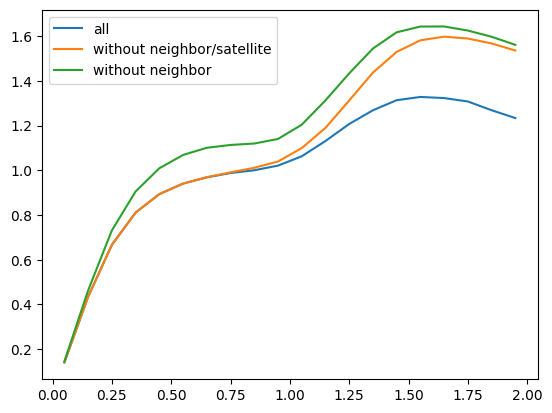

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
per=np.percentile(hgas/hdm, 50, axis=0)

ax.plot(bin, per, label='all')
per=np.percentile(hgas_neigh/hdm_neigh, 50, axis=0)
ax.plot(bin, per, label='without neighbor/satellite')
per=np.percentile(hgas_sat/hdm_sat, 50, axis=0)
ax.plot(bin, per, label='without neighbor')
ax.legend()